In [1]:
import numpy as np
import matplotlib.pyplot as plt
import struct
import torch
import torch.nn as nn
import torch.nn.functional as F

In [2]:
# mnist ref:http://yann.lecun.com/exdb/mnist/
# struct ref:https://www.cnblogs.com/gala/archive/2011/09/22/2184801.html
# numpy ref:numpy.org.cn/article/basics/numpy_matrices_vectors.html
def LoadImages(file):
    try:
        F = open(file, 'rb')
    except IOError:
        print("open error")
        F.close()

    f = F.read()

    offset=0
    fmt = '>iiii'
    magic, images, rows, columns = struct.unpack_from(fmt, f, offset)

    offset += struct.calcsize(fmt)
    fmt = '>' + str(rows * columns) + 'B'

    # images = 10 # for test

    # for CNN
    ImageSet = np.empty((images, 1, rows, columns))
    for i in range(images):
        ImageSet[i] = np.array(struct.unpack_from(fmt, f, offset)).reshape((1, rows, columns))
        offset += struct.calcsize(fmt)

    # for simple softmax
    # ImageSet = np.empty((images, rows * columns))
    # for i in range(images):
    #     ImageSet[i] = np.array(struct.unpack_from(fmt, f, offset)).reshape((rows*columns))
    #     offset += struct.calcsize(fmt)

    F.close()

    return ImageSet

In [3]:
def LoadLabels(file):
    try:
        F = open(file, 'rb')
    except IOError:
        print("open error")
        F.close()

    f = F.read()

    offset=0
    fmt = '>ii'

    magic, items = struct.unpack_from(fmt, f, offset)

    offset += struct.calcsize(fmt)
    fmt = '>B'

    # items = 10 # for test

    LabelSet = np.zeros((items, 10))
    for i in range(items):
        LabelSet[i][struct.unpack_from(fmt, f, offset)[0]] = 1
        offset += struct.calcsize(fmt)

    F.close()

    return LabelSet


In [4]:
# test
# im = LoadImages('train-images.idx3-ubyte')
# la = LoadLabels('train-labels.idx1-ubyte')
# plt.ion()
# for i in range(10):
#     plt.imshow(im[i], cmap='Greys')
#     print(la[i])
#     plt.pause(1)

In [5]:
# load training set
TrainImages_np = LoadImages('train-images.idx3-ubyte')
TrainLabels_np = LoadLabels('train-labels.idx1-ubyte')

TrainImages = torch.from_numpy(TrainImages_np)
TrainLabels = torch.from_numpy(TrainLabels_np)

In [6]:
# print(TrainImages)

In [7]:
# x = torch.randn(2,1,7,3)
# print(x)

In [8]:
# test
# print(TrainImages)
# print(TrainLabels)

In [9]:
# softmax with torch
# class SoftmaxNet(nn.Module):
#     def __init__(self, n_feature, n_hidden, n_output):
#         super(SoftmaxNet, self).__init__()
#         self.hidden = nn.Linear(n_feature, n_hidden)
#         self.predict = nn.Linear(n_hidden, n_output)

#     def forward(self, x):
        
#         x = F.relu(self.hidden(x))
#         x = self.predict(x)
#         return F.softmax(x, dim=1)

In [10]:
# softmax with torch
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()

        self.conv1 = nn.Conv2d(1, 6, 5, padding=2)
        self.pool2 = nn.MaxPool2d(2, stride=2)
        self.conv3 = nn.Conv2d(6, 16, 5)
        self.pool4 = nn.MaxPool2d(2, stride=2)
        self.full5 = nn.Linear(16*5*5, 120)
        self.full6 = nn.Linear(120, 84)
        self.out = nn.Linear(84,10)

    def forward(self, x):
        x = self.conv1(x)
        x = self.pool2(x)
        x = self.conv3(x)
        x = self.pool4(x)
        x = x.view(x.size(0), -1)
        x = self.full5(x)
        x = self.full6(x)
        x = self.out(x)
        x = F.softmax(x, dim=1)
        return x

In [11]:
net = CNN()
print(net)


CNN(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv3): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (pool4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (full5): Linear(in_features=400, out_features=120, bias=True)
  (full6): Linear(in_features=120, out_features=84, bias=True)
  (out): Linear(in_features=84, out_features=10, bias=True)
)


$$out(N_i, C_{out_j})=bias(C_{out_j})+\sum^{C_{in}-1}{k=0}weight(C{out_j},k)\bigotimes input(N_i,k)$$

In [12]:
losslist = []
timelist = []

In [13]:
optimizer = torch.optim.SGD(net.parameters(), lr=0.01)
loss_func = nn.MSELoss()

TrainImages = torch.tensor(TrainImages, dtype=torch.float32)
TrainLabels = torch.tensor(TrainLabels, dtype=torch.float32)

for t in range(1000):
    prediction = net(TrainImages)
    loss = loss_func(prediction, TrainLabels)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # for test
    print(loss.data.numpy())

    losslist.append(loss.data.numpy())
    timelist.append(t)

    if t%100 == 0:
        print("finished ", t/10, "%\n")

0.15753643
finished  0.0 %

0.14865053
0.14468844
0.14140429
0.13964352
0.1386856
0.13790216
0.13716745
0.13645458
0.13575071
0.13504423
0.13432106
0.13356297
0.13274683
0.13184951
0.13086146
0.12980393
0.1287305
0.1277033
0.12674801
0.1258504
0.12498473
0.12413676
0.1233065
0.12249879
0.12171888
0.12097119
0.12025866
0.11958256
0.11894248
0.11833683
0.117763214
0.11721849
0.11669966
0.11620359
0.11572763
0.11526912
0.114825614
0.11439483
0.11397469
0.11356324
0.11315848
0.112758696
0.11236228
0.11196779
0.11157414
0.11118051
0.11078638
0.11039151
0.10999603
0.109599665
0.1092019
0.108801715
0.108397745
0.10798862
0.10757327
0.10715093
0.10672107
0.106283456
0.10583797
0.10538474
0.10492389
0.10445561
0.103980064
0.10349762
0.10300864
0.1025135
0.10201276
0.101506904
0.10099644
0.10048184
0.09996332
0.09944083
0.09891412
0.09838279
0.09784567
0.09730131
0.09674794
0.09618308
0.09560378
0.09500646
0.09438731
0.093742475
0.09306866
0.092364244
0.09163028
0.09087082
0.090092696
0.08930442

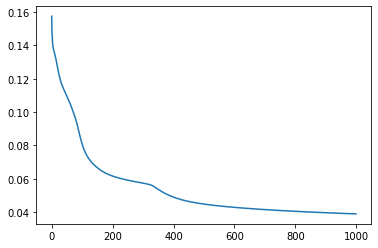

In [14]:
# print(timelist, losslist)
plt.plot(timelist, losslist)

In [15]:
def result(np_array):
    max = np_array[0]
    num = 0
    for i in range(10):
        if np_array[i] > max:
            max = np_array[i]
            num = i
    return num

In [18]:
# plt.ion()
# for i in range(10):
    
    # print((TrainLabels.numpy())[i])
    # print((prediction.detach().numpy())[i])
    # plt.imshow(((TrainImages.numpy())[i]).reshape((28, 28)), cmap='Greys')
    # plt.pause(1)

CurrLabels = (TrainLabels.numpy())
CurrPrediction = (prediction.detach().numpy())

# eps = 0.1
# print(eps)

print(CurrLabels[:10])
print(CurrPrediction[:10])

CountError = 0
CountTotal = 0

for i in range(2):
    # print(result(CurrLabels[i]))
    # print(result(CurrPrediction[i]))
    CountTotal += 1
    if result(CurrLabels[i]) != result(CurrPrediction[i]):
        CountError += 1

print(float(CountError)/float(CountTotal))
# print(np.max(CurrLabels, axis=1))
# print(np.max(CurrPrediction, axis=1))

# print((np.where(CurrLabels==np.max(CurrLabels, axis=1))))
# print((np.where(abs(CurrPrediction - np.max(CurrPrediction, axis=1))<eps)))

[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]
[[1.1704374e-08 1.5984724e-05 9.5892512e-09 1.8001104e-02 1.0244526e-05
  9.7741336e-01 4.7392327e-06 4.2368318e-03 2.5118678e-04 6.6508510e-05]
 [3.5954099e-07 8.1684090e-02 5.3551226e-05 2.9366654e-01 2.8333664e-03
  1.8196195e-02 8.2108108e-03 3.9086664e-01 3.6133755e-02 1.6835465e-01]
 [3.6449748e-07 1.6817506e-04 7.1672027e-08 1.7358104e-04 9.9235886e-01
  6.6613269e-05 5.6668036e-03 1.3307676e-04 1.3912292e-04 1.2932312e-03]
 [2.6231666e-07 9.7576874e-01 9.5824055e-07 6.8301186e-03 1.0735969e-03
  3.1937400e-04 1.6074631e-03 5.1503000e-04 1.3791720e-02 9.2621049e-05]
 [1.3574914e-05 3.5806164e-02 1.1011784e-04 4.3873638e-03 3.2937285e-01
  2.0918488e-03 2

In [22]:
# save model
torch.save(net.state_dict(), './model-version-1-args')

In [23]:
the_model = CNN()
the_model.load_state_dict(torch.load('./model-version-1-args'))

<All keys matched successfully>

In [24]:
TestImages_np = LoadImages('t10k-images.idx3-ubyte')
TestLabels_np = LoadLabels('t10k-labels.idx1-ubyte')

TestImages = torch.from_numpy(TestImages_np)
TestImages = torch.tensor(TestImages, dtype=torch.float32)

prediction = the_model(TestImages)

CurrLabels = TestLabels_np
CurrPrediction = (prediction.detach().numpy())

# eps = 0.1
# print(eps)

print(CurrLabels[:10])
print(CurrPrediction[:10])

CountError = 0
CountTotal = 0

for i in range(1000):
    # print(result(CurrLabels[i]))
    # print(result(CurrPrediction[i]))
    CountTotal += 1
    if result(CurrLabels[i]) != result(CurrPrediction[i]):
        CountError += 1

print(float(CountError)/float(CountTotal))

[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]
[[6.56450450e-09 5.79560322e-07 4.11982292e-05 1.68482991e-04
  1.56447499e-07 1.38089973e-07 7.22062077e-10 9.99639750e-01
  1.54989493e-07 1.49545071e-04]
 [1.17343057e-09 9.61692259e-02 1.68994063e-08 2.24823102e-01
  1.55917412e-04 3.05709958e-01 1.81896374e-01 6.69854126e-06
  1.89385489e-01 1.85325753e-03]
 [4.61487653e-05 9.36504424e-01 1.71664709e-04 2.98576965e-03
  4.04144544e-03 5.49292518e-03 8.04382283e-03 9.60285019e-04
  3.75147834e-02 4.23862087e-03]
 [1.40459706e-08 3.25975940e-03 8.21679293e-07 7.66204251e-03
  9.56669828e-05 1.01325706e-01 5.09664940e-04 4.10612710e-02
  1.24033559e-02 8.33681881e-01]
 [3.40542852e-06 3.58081830e-04 3.2445699